In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras_tuner.tuners import BayesianOptimization
from functools import partial
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
import pandas as pd


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)

y_train = np.reshape(y_train, (y_train.shape[0],y_train.shape[2]))
y_test = np.reshape(y_test, (y_test.shape[0],y_test.shape[2]))

X_train = X_train / 255
X_test = X_test / 255

In [3]:
print(y_test.shape)
print(y_test[0])


(10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [4]:
print(X_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


Populating the interactive namespace from numpy and matplotlib


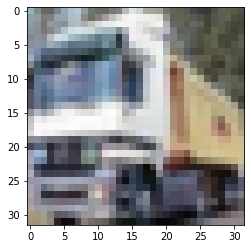

In [5]:
%pylab inline
import matplotlib.pyplot as plt
from PIL import Image

imgplot = plt.imshow(X_train[1])
plt.show()


In [21]:
def modelo(hp):
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(hp.Choice("dropout", values=[0.3, 0.2, 0.1])))
    model.add(Dense(10, activation='softmax'))

    adam = keras.optimizers.Adam(learning_rate= hp.Float("learning_rate", min_value = 0.0005, max_value = 0.005, step = 0.0005))
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model


In [22]:
tuner = BayesianOptimization(modelo, objective='val_accuracy', max_trials=10)
tuner.search(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 100, epochs = 5)

Trial 10 Complete [00h 05m 05s]
val_accuracy: 0.6725999712944031

Best val_accuracy So Far: 0.6743999719619751
Total elapsed time: 01h 31m 56s
INFO:tensorflow:Oracle triggered exit


In [23]:
best = tuner.get_best_hyperparameters()
print(best[0].get("dropout"))
print(best[0].get("learning_rate"))

0.1
0.0015
